# Proyecto Data Science - Top películas 1990 - 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Tomamos el Top 200 de películas basados en los índices IMDb y MetaScore

In [2]:
data = pd.read_csv('imdb_movie_dataset.csv')
metascore = data['MetaScore']
imdb = data['IMDb_rating'] * 10
part = (metascore + imdb) / 2
data['movie_score'] = part

sorted_data = data.sort_values(by='movie_score', ascending=False)
final_data = sorted_data[:200]

### Tomamos las columnas útiles para nuestro proceso de datos

In [3]:
clean_data = final_data[['title', 'year', 'genre', 'runtime', 'directors', 'stars', 'movie_score']]
clean_data

,title,year,genre,runtime,directors,stars,movie_score
3250,The Lord of the Rings: The Return of the King,2003,"Action, Adventure, Drama",201 min,Peter Jackson,"Elijah Wood,Viggo Mortensen,Ian McKellen,Orlan...",92.0
750,Schindler's List,1993,"Biography, Drama, History",195 min,Steven Spielberg,"Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",92.0
1002,Pulp Fiction,1994,"Crime, Drama",154 min,Quentin Tarantino,"John Travolta,Uma Thurman,Samuel L. Jackson,Br...",91.5
2756,Spirited Away,2001,"Animation, Adventure, Family",125 min,Hayao Miyazaki,"Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rum...",91.0
7252,Parasite,2019,"Comedy, Drama, Horror",132 min,Bong Joon Ho,"Kang-ho Song,Sun-kyun Lee,Yeo-jeong Cho,Choi W...",90.5
...,...,...,...,...,...,...,...
3619,Maria Full of Grace,2004,"Crime, Drama",101 min,Joshua Marston,"Catalina Sandino Moreno,Guilied Lopez,Orlando ...",80.5
1515,The English Patient,1996,"Drama, Romance, War",162 min,Anthony Minghella,"Ralph Fiennes,Juliette Binoche,Willem Dafoe,Kr...",80.5
1277,Sense and Sensibility,1995,"Drama, Romance",136 min,Ang Lee,"Emma Thompson,Kate Winslet,James Fleet,Tom Wil...",80.5
7272,Toy Story 4,2019,"Animation, Adventure, Comedy",100 min,Josh Cooley,"Tom Hanks,Tim Allen,Annie Potts,Tony Hale",80.5


## Top 10 mejores calificaciones

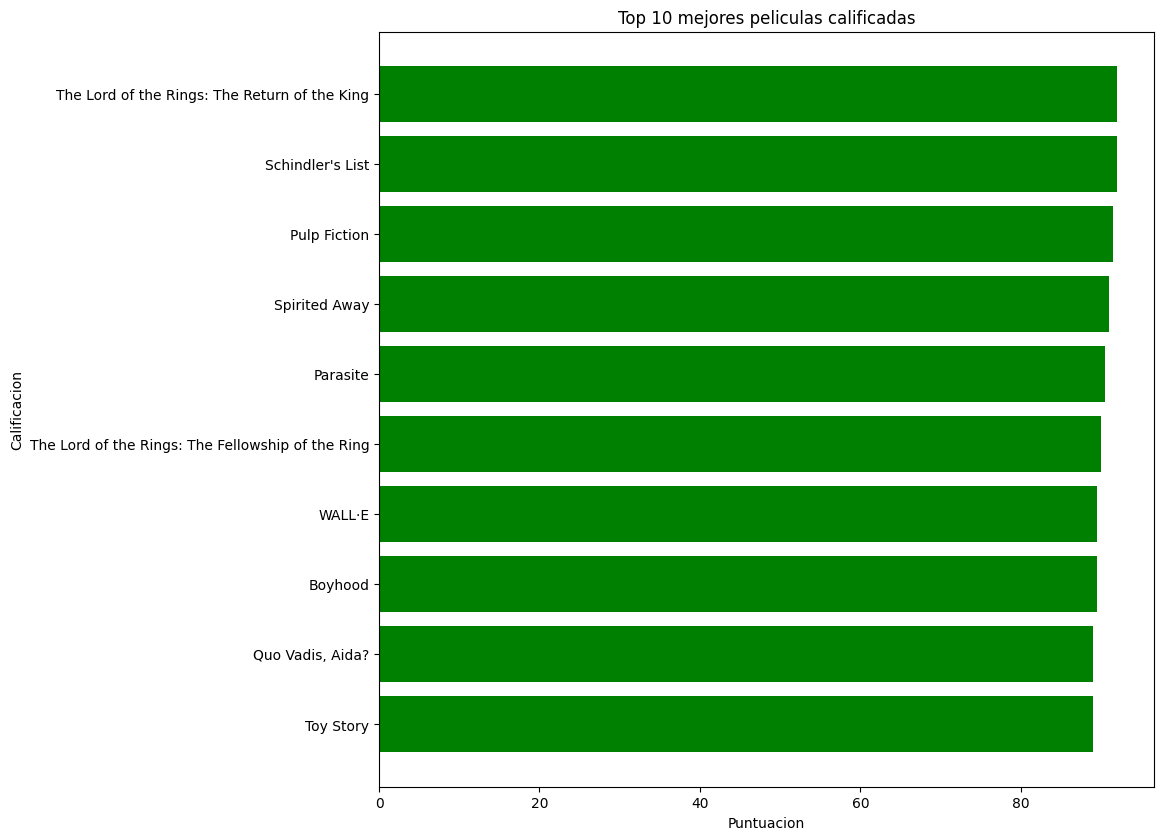

In [4]:
top_10 = clean_data[:10]
top_10.to_csv('csv/top_10.csv')
x = top_10['title']
y = top_10['movie_score']
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100
plt.barh(x[::-1], y[::-1], color='green')
plt.xlabel('Puntuacion')
plt.ylabel('Calificacion')
plt.title('Top 10 mejores peliculas calificadas')
plt.show()

## Cantidad de peliculas Top por año

In [5]:
clean_year = clean_data['year']
counted = clean_year.value_counts().rename_axis('year').reset_index(name='value')
counted.to_csv('csv/top_per_year.csv')

<BarContainer object of 32 artists>

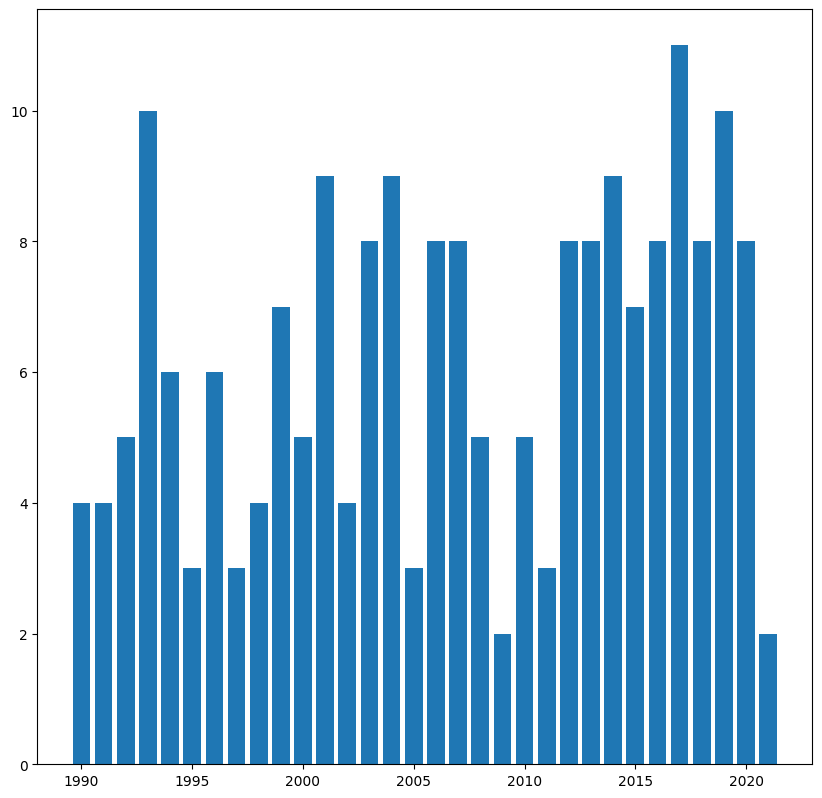

In [6]:
x = counted['year'].values
y = counted['value'].values
plt.bar(x, y)

In [7]:
score_year_data = clean_data[['year', 'movie_score']]
res = []
for i in range(1990, 2022):
    test = score_year_data.loc[score_year_data['year'] == i]
    median = test['movie_score'].mean()
    res.append([i, median])
score_year = pd.DataFrame(res, columns=['year', 'score_mean'])
score_year.to_csv('csv/mean_score_per_year.csv')

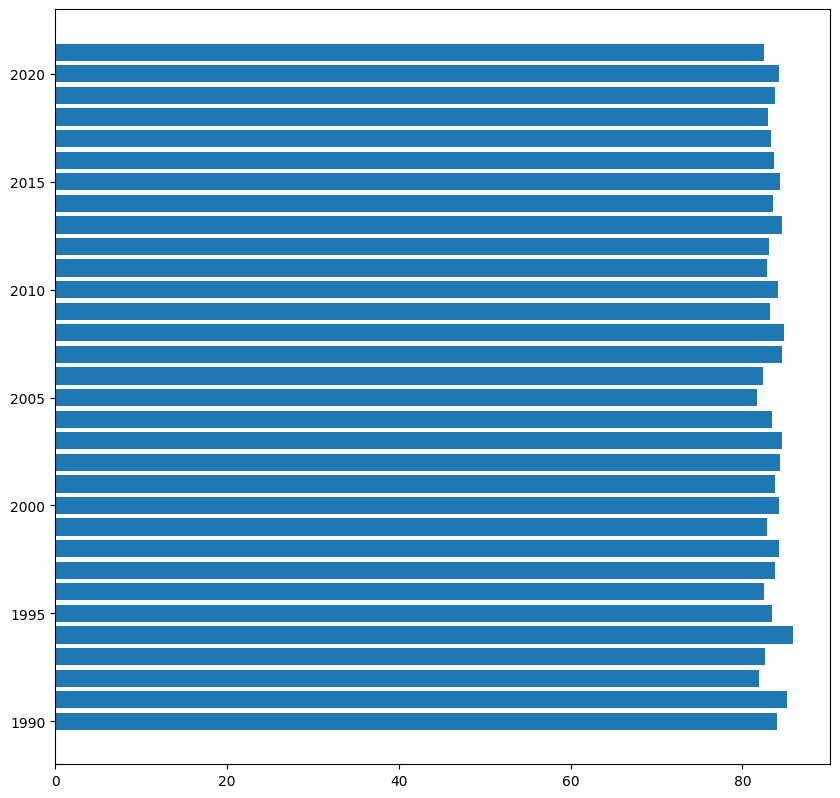

In [8]:
x = score_year['year'].values
y = score_year['score_mean'].values

plt.barh(x, y)
plt.show()

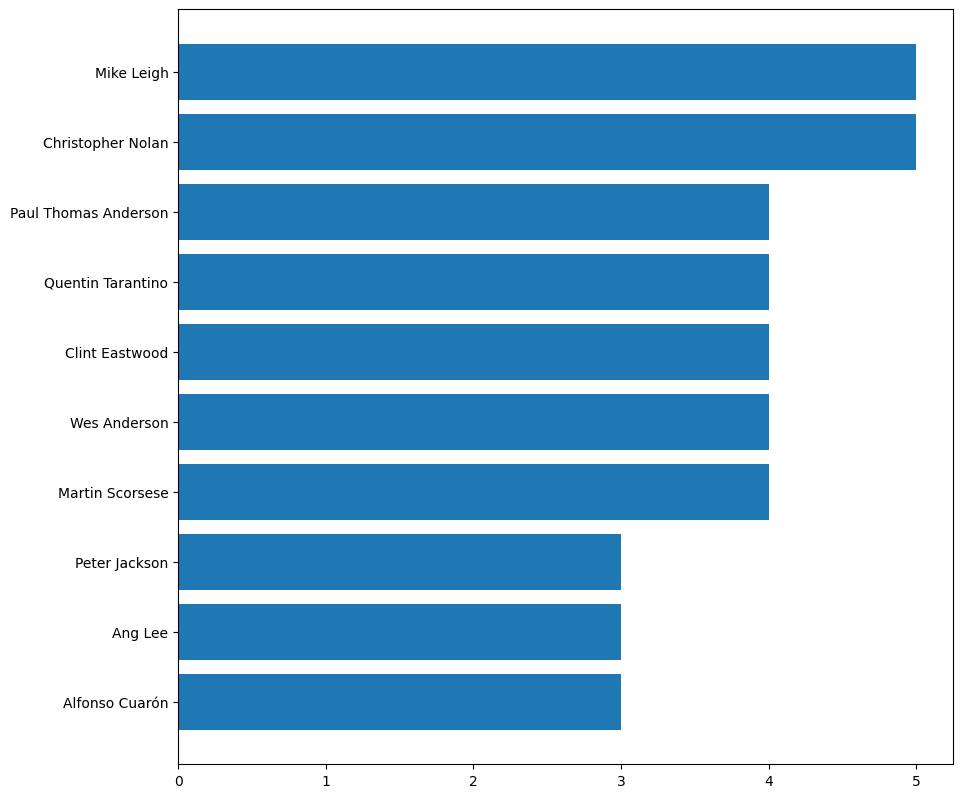

In [9]:
top_directors = clean_data['directors'].value_counts().rename_axis('directors').reset_index(name='value')
top_10_directors = top_directors[:10]
top_10_directors.to_csv('csv/top_10_directors.csv')
x = top_10_directors['directors'].values
y = top_10_directors['value'].values
plt.barh(x[::-1], y[::-1])
plt.show()

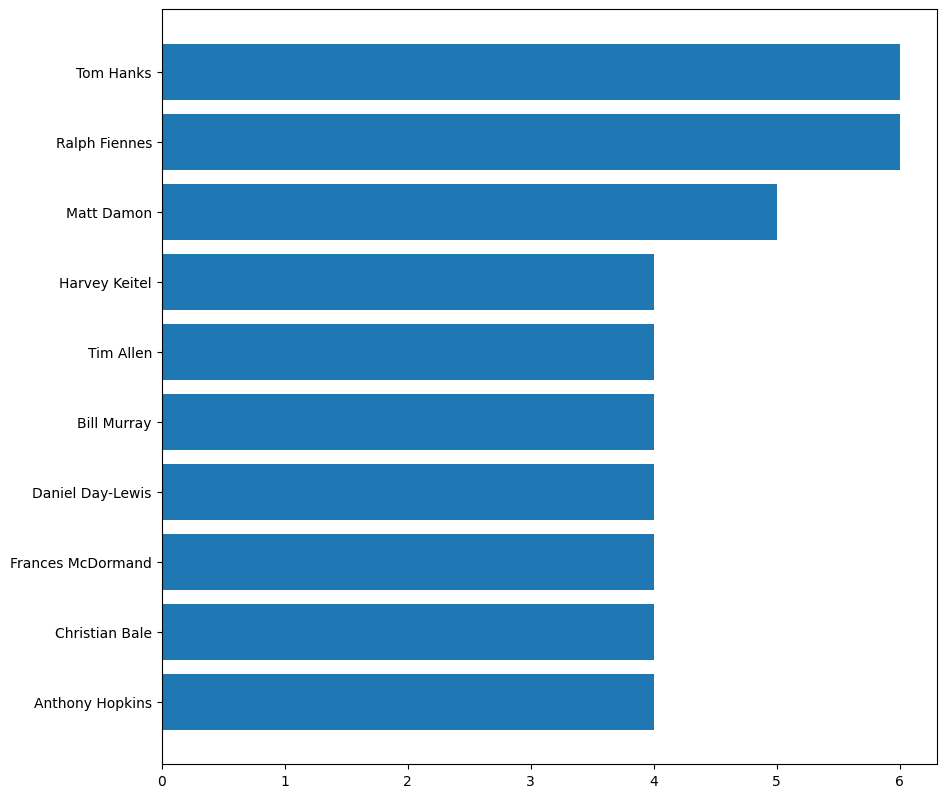

In [10]:
top_stars = clean_data['stars'].to_numpy()
stars_clean = [x for x in top_stars if pd.isnull(x) == False]
stars_array = []
for element in stars_clean:
    stars_array.append(element.split(','))
out = np.concatenate(stars_array).ravel()
out_pd = pd.DataFrame(out)
counted_stars = out_pd.value_counts().rename_axis('stars').reset_index(name='value')

top_10_stars = counted_stars[:10]
top_10_stars.to_csv('csv/top_10_stars.csv')
x = top_10_stars['stars'].values
y = top_10_stars['value'].values
plt.barh(x[::-1], y[::-1])
plt.show()

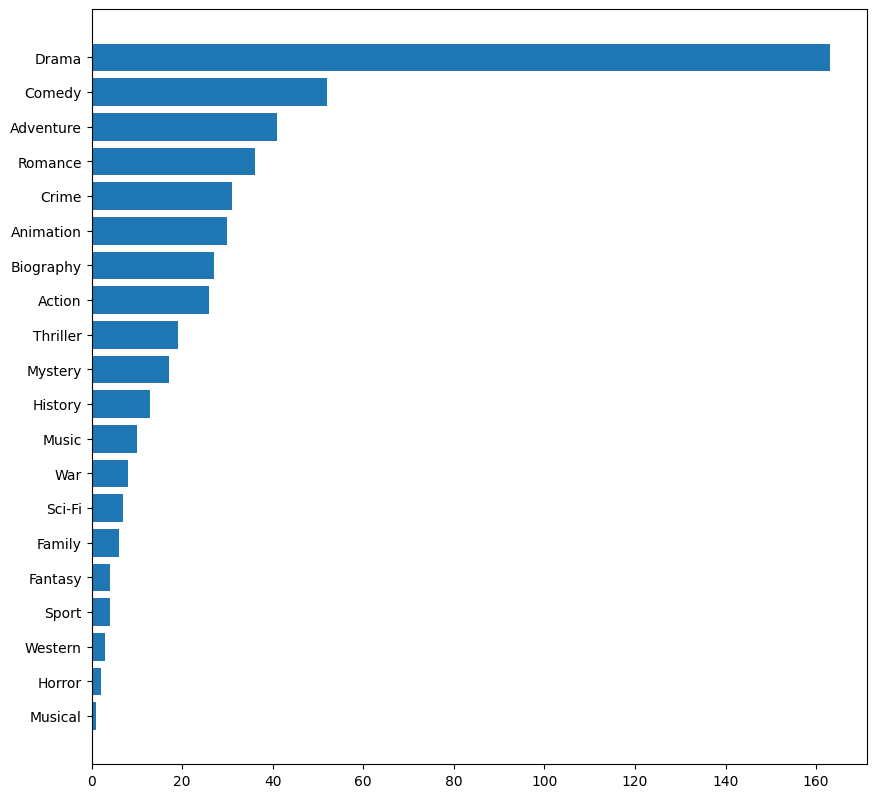

In [11]:
top_genre = clean_data['genre'].to_numpy()
genre_clean = [x for x in top_genre if pd.isnull(x) == False]
genre_array = []
for element in genre_clean:
    genre_array.append(element.split(','))
out = np.concatenate(genre_array).ravel()
out2 = []
for element in out:
    out2.append(element.replace(' ', ''))
out_pd = pd.DataFrame(out2)
counted_genre = out_pd.value_counts().rename_axis('genre').reset_index(name='value')

top_10_genre = counted_genre
top_10_genre.to_csv('csv/top_genre.csv')
x = top_10_genre['genre'].values
y = top_10_genre['value'].values
plt.barh(x[::-1], y[::-1])
plt.show()

In [12]:
time_year = clean_data[['runtime', 'year']]
time_clear = time_year['runtime'].str.strip(' min')
#time_year.runtime = time_clear
time_year['runtime'] = time_clear
time_sorted = time_year.sort_values(by=['year'])
time_year_mean = []
for age in range(1990, 2022):
    unique_year = time_sorted[time_sorted.year == age]
    runtime = np.array(unique_year.runtime, dtype='int')
    runtime_mean = runtime.mean()
    time_year_mean.append([age, runtime_mean])
time_year_mean = pd.DataFrame(time_year_mean, columns=['year', 'run_mean'])
time_year_mean.to_csv('csv/mean_time_per_year.csv')

C:\Users\Martin.DESKTOP-RC23929\AppData\Local\Temp\ipykernel_12016\2476197397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_year['runtime'] = time_clear


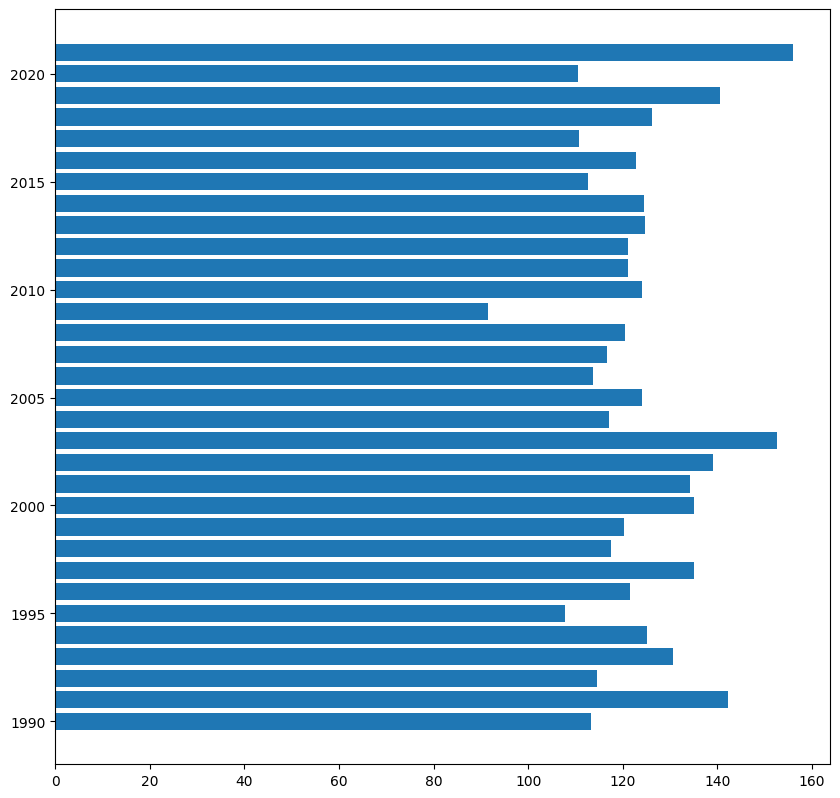

In [13]:
x = time_year_mean['year'].values
y = time_year_mean['run_mean'].values

plt.barh(x, y)
plt.show()

In [46]:
#clean_data[clean_data['stars'] == 'Tom Hanks']
#clean_data[clean_data["genre"].str.contains("Adventure").fillna(False)]
time_year_mean['run_mean'].mean()

123.9540505501443